In [ ]:
from google.colab import files
uploaded = files.upload()

Saving student_performances.csv to student_performances (1).csv


# In this tutorial you are given a task of classifying students grades bases on various properties of the students and their families. The students can have 5 kinds of grades - Excellent, Very good, Good, Satisfactory, and poor.

# You need to develop different classifiers and determine which one of them give best performaces on various metrices.

# Import Libraries.
## I have imported few new libraries for this week  but you need to import rest of them.

In [1]:

# Your code to import all the relevant libraries.

from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt  


# Read and display dataset.

In [2]:
# Your code to read data
df=pd.read_csv("student_performances.csv")
# Your code to print first few samples of the dataset.
df.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,grades
0,F,18,U,GT3,A,4,4,at_home,teacher,course,...,no,no,4,3,4,1,1,3,6,poor
1,F,17,U,GT3,T,1,1,at_home,other,course,...,yes,no,5,3,3,1,1,3,4,poor
2,F,15,U,LE3,T,1,1,at_home,other,other,...,yes,no,4,3,2,2,3,3,10,satisfactory
3,F,15,U,GT3,T,4,2,health,services,home,...,yes,yes,3,2,2,1,1,5,2,very good
4,F,16,U,GT3,T,3,3,other,other,home,...,no,no,4,3,2,1,2,5,4,satisfactory


# Print the information about the dataset.

## You need to convert all the object datatypes (except output variable - grades) to the numbers using either labelencoding or one hot encoding.

In [3]:
# Your code to print the key information about the datset. Use - .info method.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         395 non-null    object
 1   age         395 non-null    int64 
 2   address     395 non-null    object
 3   famsize     395 non-null    object
 4   Pstatus     395 non-null    object
 5   Medu        395 non-null    int64 
 6   Fedu        395 non-null    int64 
 7   Mjob        395 non-null    object
 8   Fjob        395 non-null    object
 9   reason      395 non-null    object
 10  guardian    395 non-null    object
 11  traveltime  395 non-null    int64 
 12  studytime   395 non-null    int64 
 13  failures    395 non-null    int64 
 14  schoolsup   395 non-null    object
 15  famsup      395 non-null    object
 16  paid        395 non-null    object
 17  activities  395 non-null    object
 18  nursery     395 non-null    object
 19  higher      395 non-null    object
 20  internet  

# Converting the columns  ['Fjob', 'Mjob', 'reason', 'guardian'] into one hot vectors.

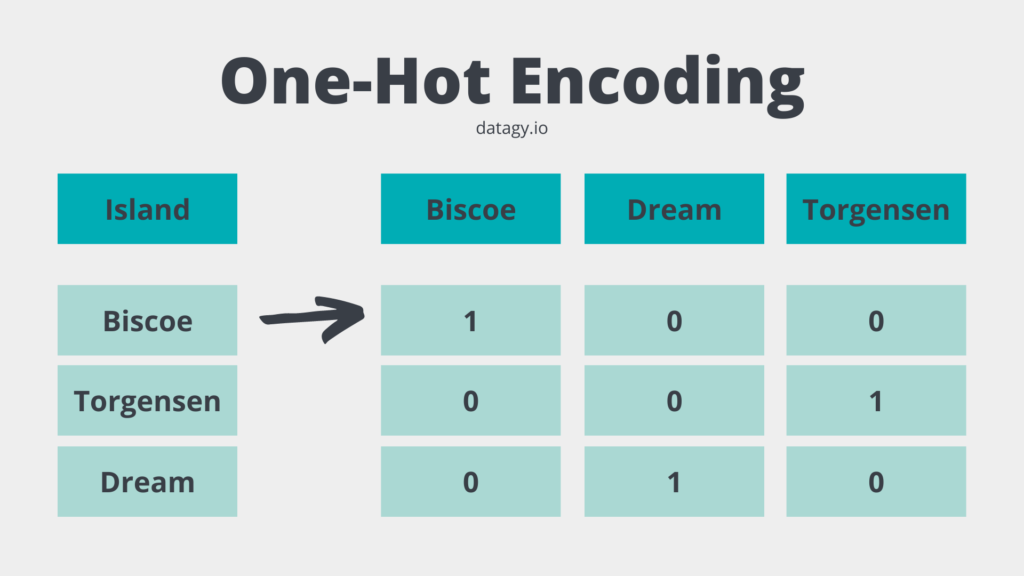

In [4]:
data = pd.get_dummies(df, columns = ['Fjob', 'Mjob', 'reason', 'guardian'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         395 non-null    object
 1   age         395 non-null    int64 
 2   address     395 non-null    object
 3   famsize     395 non-null    object
 4   Pstatus     395 non-null    object
 5   Medu        395 non-null    int64 
 6   Fedu        395 non-null    int64 
 7   Mjob        395 non-null    object
 8   Fjob        395 non-null    object
 9   reason      395 non-null    object
 10  guardian    395 non-null    object
 11  traveltime  395 non-null    int64 
 12  studytime   395 non-null    int64 
 13  failures    395 non-null    int64 
 14  schoolsup   395 non-null    object
 15  famsup      395 non-null    object
 16  paid        395 non-null    object
 17  activities  395 non-null    object
 18  nursery     395 non-null    object
 19  higher      395 non-null    object
 20  internet  

# Note that you can also use sklearn.preprocessing.OneHotEncoder instead of pd.get_dummies.

# Next, print the first few rows of the data (dataset have been stored in data in previous cell).

In [5]:
# Your code to print first few rows of the data.
df.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,grades
0,F,18,U,GT3,A,4,4,at_home,teacher,course,...,no,no,4,3,4,1,1,3,6,poor
1,F,17,U,GT3,T,1,1,at_home,other,course,...,yes,no,5,3,3,1,1,3,4,poor
2,F,15,U,LE3,T,1,1,at_home,other,other,...,yes,no,4,3,2,2,3,3,10,satisfactory
3,F,15,U,GT3,T,4,2,health,services,home,...,yes,yes,3,2,2,1,1,5,2,very good
4,F,16,U,GT3,T,3,3,other,other,home,...,no,no,4,3,2,1,2,5,4,satisfactory


# Converting other text values in the dataframe to numbers using label encoding.

In [7]:
labelencoder = LabelEncoder()

labelencoder.fit(data['sex'])
data ['sex'] = labelencoder.transform(data['sex'])

#
## Your code to convert transform address to the numbers
#
labelencoder.fit(data['address'])
data ['address'] = labelencoder.transform(data['address'])


#
## Your code to convert transform famsize to the numbers
#
labelencoder.fit(data['famsize'])
data ['famsize'] = labelencoder.transform(data['famsize'])

#
## Your code to convert transform Pstatus to the numbers
#
labelencoder.fit(data['Pstatus'])
data ['Pstatus'] = labelencoder.transform(data['Pstatus'])

#
## Your code to convert transform schoolsup to the numbers
#

labelencoder.fit(data['schoolsup'])
data ['schoolsup'] = labelencoder.transform(data['schoolsup'])
#
## Your code to convert transform famsup to the numbers
#
labelencoder.fit(data['famsup'])
data ['famsup'] = labelencoder.transform(data['famsup'])
#
## Your code to convert transform paid to the numbers
#
labelencoder.fit(data['paid'])
data ['paid'] = labelencoder.transform(data['paid'])

#
## Your code to convert transform activities to the numbers
#
labelencoder.fit(data['activities'])
data ['activities'] = labelencoder.transform(data['activities'])
#
## Your code to convert transform nursery to the numbers
#
labelencoder.fit(data['nursery'])
data ['nursery'] = labelencoder.transform(data['nursery'])

#
## Your code to convert transform higher to the numbers
#
labelencoder.fit(data['higher'])
data ['higher'] = labelencoder.transform(data['higher'])

#
## Your code to convert transform internet to the numbers
#
labelencoder.fit(data['internet'])
data ['internet'] = labelencoder.transform(data['internet'])
#
## Your code to convert transform romantic to the numbers
#
labelencoder.fit(data['romantic'])
data ['romantic'] = labelencoder.transform(data['romantic'])
data.head()


,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,Mjob_other,Mjob_services,Mjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,18,1,0,0,4,4,2,2,0,...,0,0,0,1,0,0,0,0,1,0
1,0,17,1,0,1,1,1,1,2,0,...,0,0,0,1,0,0,0,1,0,0
2,0,15,1,1,1,1,1,1,2,3,...,0,0,0,0,0,1,0,0,1,0
3,0,15,1,0,1,4,2,1,3,0,...,0,0,0,0,1,0,0,0,1,0
4,0,16,1,0,1,3,3,1,2,0,...,1,0,0,0,1,0,0,1,0,0


# Is their an efficient way to do this? Could you use loops. Try to convert it into an efficient code and replace with the above code?


# Next - Print few samples of the data to ensure everything is number except 'grades' column.

In [8]:
# Your code to print first few samples of the data.
data.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,Mjob_other,Mjob_services,Mjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,18,1,0,0,4,4,2,2,0,...,0,0,0,1,0,0,0,0,1,0
1,0,17,1,0,1,1,1,1,2,0,...,0,0,0,1,0,0,0,1,0,0
2,0,15,1,1,1,1,1,1,2,3,...,0,0,0,0,0,1,0,0,1,0
3,0,15,1,0,1,4,2,1,3,0,...,0,0,0,0,1,0,0,0,1,0
4,0,16,1,0,1,3,3,1,2,0,...,1,0,0,0,1,0,0,1,0,0


In [9]:
# Your code to print information on the samples of data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   sex                395 non-null    int64 
 1   age                395 non-null    int64 
 2   address            395 non-null    int64 
 3   famsize            395 non-null    int32 
 4   Pstatus            395 non-null    int64 
 5   Medu               395 non-null    int64 
 6   Fedu               395 non-null    int64 
 7   traveltime         395 non-null    int64 
 8   studytime          395 non-null    int64 
 9   failures           395 non-null    int64 
 10  schoolsup          395 non-null    int64 
 11  famsup             395 non-null    int64 
 12  paid               395 non-null    int64 
 13  activities         395 non-null    int64 
 14  nursery            395 non-null    int32 
 15  higher             395 non-null    int64 
 16  internet           395 non-null    int64 
 1

# Separate input X and output y.

## X is the all columns except 'grades'.
## y is 'grades' column.

In [10]:
# Your code to get X from data
# Your code to get y from data
X = data.drop('grades',axis=1).values
labelencoder.fit(data['grades'])
data ['grades'] = labelencoder.transform(data['grades'])
y = data['grades'].values


# Print shapes of X and y to make sure everything is good

In [11]:
# Print shape of X
print(X.shape)
# Print shape of y
print(y.shape)
# Print X
print(X)
# Print y
print(y)

(395, 42)
(395,)
[[ 0 18  1 ...  0  1  0]
 [ 0 17  1 ...  1  0  0]
 [ 0 15  1 ...  0  1  0]
 ...
 [ 1 21  0 ...  0  0  1]
 [ 1 18  0 ...  0  1  0]
 [ 1 19  1 ...  1  0  0]]
[2 2 3 4 3 4 3 2 0 4 2 1 4 3 0 4 4 3 2 3 4 4 0 1 2 2 3 4 3 3 1 0 0 1 4 2 0
 4 3 1 3 1 0 3 2 2 3 0 4 2 1 1 3 3 1 3 4 4 2 0 3 3 2 2 3 4 1 2 2 0 4 3 2 4
 3 3 3 3 3 2 1 3 2 4 3 2 2 4 3 2 2 0 2 3 4 3 4 3 4 2 2 0 4 2 0 3 2 0 1 0 0
 3 1 0 2 0 4 1 2 1 4 4 1 1 2 1 3 2 2 0 2 2 1 3 2 2 2 2 1 4 2 2 3 1 2 3 2 3
 2 3 2 4 3 2 1 2 1 3 4 1 2 2 2 3 2 1 3 0 2 4 2 0 3 2 2 2 3 2 2 3 2 1 0 2 1
 3 3 4 2 3 1 2 2 3 4 4 0 3 0 3 0 3 3 2 3 2 2 1 3 2 2 1 4 2 3 4 2 2 2 3 2 2
 0 1 4 2 4 1 2 1 4 3 2 1 2 3 1 1 3 2 1 1 2 1 2 0 1 2 2 4 2 3 2 2 1 2 1 3 4
 2 0 2 1 2 2 0 3 3 3 2 2 4 3 4 3 1 2 2 2 3 2 3 1 3 3 3 0 1 4 4 3 4 1 0 4 3
 2 2 4 0 3 3 4 0 1 1 0 2 1 3 2 1 3 3 1 3 2 2 3 3 1 2 3 4 4 3 0 3 2 4 2 4 2
 2 2 4 1 2 0 3 3 2 4 2 3 4 0 2 4 1 2 1 2 2 3 2 1 3 3 0 1 1 3 4 1 3 1 2 3 3
 2 1 3 2 0 3 4 3 4 3 4 2 3 2 2 3 2 2 2 2 2 0 2 3 2]


# Next  - Split data into train and test set.

In [13]:
# Your code to split data into train and test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42)

#
#
# Print shapes of train and test data to make sure everyhing is in order.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(355, 42)
(40, 42)
(355,)
(40,)


# Next - Develop a SVM classifier and fit into the train dataset.

In [14]:
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

SVC()

# Next - prdict the values on the input test set.

# Find accuracy, precision, recall, f-score.

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
y_pred = classifier.predict(X_test)

print (print("Accuracy test set: ", accuracy_score(y_test, y_pred)))

print (print("Precision test set: ", precision_score(y_test, y_pred, average = 'micro' )))
print (print("Recall test set: ", recall_score(y_test, y_pred, average = 'micro' )))
print (print("F-score test set: ", f1_score(y_test, y_pred, average = 'micro' )))

print (classification_report(y_test, y_pred))

Accuracy test set:  0.4
None
Precision test set:  0.4
None
Recall test set:  0.4
None
F-score test set:  0.4000000000000001
None
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         4
           2       0.39      1.00      0.57        15
           3       0.50      0.14      0.22         7
           4       0.00      0.00      0.00         9

    accuracy                           0.40        40
   macro avg       0.18      0.23      0.16        40
weighted avg       0.24      0.40      0.25        40



D:\Anaconda_Python\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda_Python\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda_Python\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Find accuracy, precision, recall, and f-score on training dataset.

In [17]:
train_data_predictions = classifier.predict(X_train)

print (print("Accuracy train set: ", accuracy_score(y_train, train_data_predictions)))
print (print("Precision train set: ", precision_score(y_train, train_data_predictions, average = 'micro' )))
print (print("Recall train set: ", recall_score(y_train, train_data_predictions, average = 'micro' )))
print (print("F-score train set: ", f1_score(y_train, train_data_predictions, average = 'micro' )))

print (classification_report(y_train, train_data_predictions))

Accuracy train set:  0.3436619718309859
None
Precision train set:  0.3436619718309859
None
Recall train set:  0.3436619718309859
None
F-score train set:  0.3436619718309859
None
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.00      0.00      0.00        58
           2       0.34      0.96      0.51       115
           3       0.34      0.12      0.18        96
           4       0.00      0.00      0.00        51

    accuracy                           0.34       355
   macro avg       0.14      0.22      0.14       355
weighted avg       0.20      0.34      0.21       355



D:\Anaconda_Python\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda_Python\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda_Python\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Display confusion matrix between actual and predicted values on the test data.

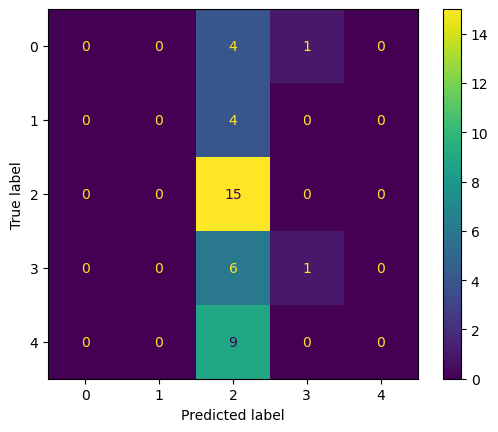

In [18]:
#
# Your code to display confusion matrix between predicted output and actual output
Con_Fus = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = Con_Fus, display_labels=classifier.classes_)
disp.plot()
plt.show()


# Earlier, we used rfb Kernel. Now, we will test other kernels too.

# We will test on ['linear', 'poly', 'rbf', 'sigmoid' ] kernels.

[0.35, 0.35, 0.4, 0.35]


<BarContainer object of 4 artists>

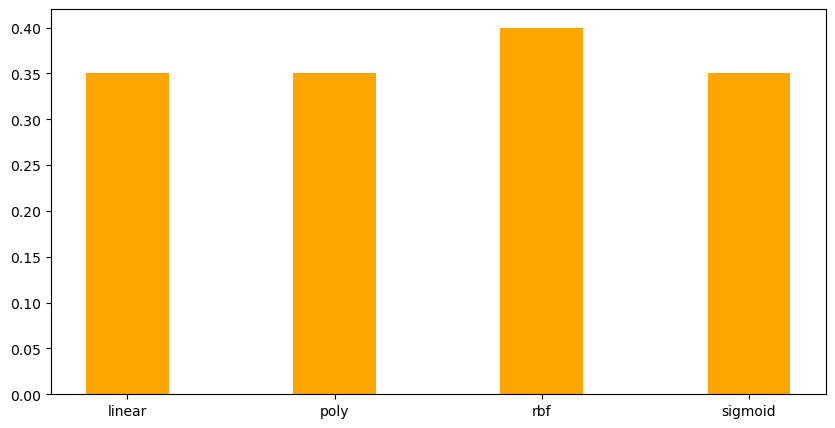

In [19]:
# Create a list kernels with values ['linear', 'poly', 'rbf', 'sigmoid' ]
kernels=['linear', 'poly', 'rbf', 'sigmoid' ]
# Create an empty list accuracy
accuracy=[]

for k in kernels:
  
  # Your code to compare the classifier for different Kernesls
    classifier = SVC(kernel = k)
    classifier.fit(X_train, y_train)
    k_pred = classifier.predict(X_test)
    accuracy.append(accuracy_score(y_test, k_pred))

#
# Your code to plot accuracy vs kernels
print(accuracy)
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(kernels,accuracy, color ='orange', 
        width = 0.4)
#

# Which Kernel function is giving you best accuracy?

# Next - Develop KNN and Losgistic regression classifiers for this dataset.

In [20]:
from sklearn.neighbors import KNeighborsClassifier
# Develop KNN-based classifier. Use number of neigbours of your choice
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

# Evaluate KNN for accuracy, precision, recall, f-score, and classification report on test data.

In [21]:
# Your code to evaluate the classifer on test data
knn_pred = knn.predict(X_test)
print (knn_pred)
k_pred = knn.predict(X_test)
print (print("Accuracy test set: ", accuracy_score(y_test, knn_pred)))

print (print("Precision test set: ", precision_score(y_test, knn_pred, average = 'micro' )))
print (print("Recall test set: ", recall_score(y_test, knn_pred, average = 'micro' )))
print (print("F-score test set: ", f1_score(y_test, knn_pred, average = 'micro' )))

print (classification_report(y_test, knn_pred))

[2 1 2 1 2 1 0 1 2 2 0 4 1 2 4 2 4 2 1 2 3 1 4 2 3 2 4 3 0 1 2 0 4 0 4 2 4
 3 4 2]
Accuracy test set:  0.4
None
Precision test set:  0.4
None
Recall test set:  0.4
None
F-score test set:  0.4000000000000001
None
              precision    recall  f1-score   support

           0       0.40      0.40      0.40         5
           1       0.25      0.50      0.33         4
           2       0.64      0.60      0.62        15
           3       0.00      0.00      0.00         7
           4       0.33      0.33      0.33         9

    accuracy                           0.40        40
   macro avg       0.33      0.37      0.34        40
weighted avg       0.39      0.40      0.39        40



# Evaluate KNN for accuracy, precision, recall, f-score, and classification report on train data.



In [22]:
# Your code to evaluate the classifer on train data
k_pred_train = knn.predict(X_train)
print (print("Accuracy train set: ", accuracy_score(y_train, k_pred_train)))

print (print("Precision train set: ", precision_score(y_train, k_pred_train, average = 'micro' )))
print (print("Recall train set: ", recall_score(y_train, k_pred_train, average = 'micro' )))
print (print("F-score train set: ", f1_score(y_train, k_pred_train, average = 'micro' )))

print (classification_report(y_train, k_pred_train))


Accuracy train set:  0.5183098591549296
None
Precision train set:  0.5183098591549296
None
Recall train set:  0.5183098591549296
None
F-score train set:  0.5183098591549296
None
              precision    recall  f1-score   support

           0       0.31      0.26      0.28        35
           1       0.44      0.47      0.45        58
           2       0.64      0.70      0.67       115
           3       0.51      0.52      0.51        96
           4       0.45      0.35      0.40        51

    accuracy                           0.52       355
   macro avg       0.47      0.46      0.46       355
weighted avg       0.51      0.52      0.51       355



# Display confusion matric between predicted and actual values.

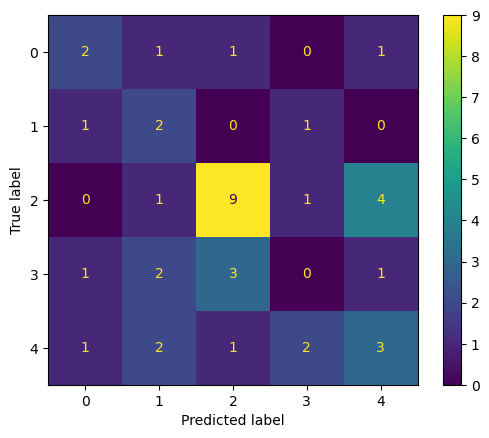

In [23]:
# Your code to display confusion matrix
cm = confusion_matrix(y_test, knn_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=knn.classes_)
disp.plot()
plt.show()


# Develop Logistic Regression-based classifier.

In [24]:
from sklearn.linear_model import LogisticRegression
# Your code to develop logistic regression-based classifier
lgr = LogisticRegression(random_state = 56, tol=0.0001)
lgr.fit(X_train, y_train) 

D:\Anaconda_Python\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=56)

# Evaluate Logistic Regression for accuracy, precision, recall, f-score, and classification report on test data.

In [25]:
# Your code to evaluate the logistic regression classifier on test data
 
lgr_pred = lgr.predict(X_test)
print (print("Accuracy test set: ", accuracy_score(y_test, lgr_pred)))

print (print("Precision test set: ", precision_score(y_test, lgr_pred, average = 'micro' )))
print (print("Recall test set: ", recall_score(y_test, lgr_pred, average = 'micro' )))
print (print("F-score test set: ", f1_score(y_test, lgr_pred, average = 'micro' )))

print (classification_report(y_test, lgr_pred))

Accuracy test set:  0.4
None
Precision test set:  0.4
None
Recall test set:  0.4
None
F-score test set:  0.4000000000000001
None
              precision    recall  f1-score   support

           0       0.50      0.60      0.55         5
           1       0.17      0.25      0.20         4
           2       0.64      0.47      0.54        15
           3       0.27      0.43      0.33         7
           4       0.33      0.22      0.27         9

    accuracy                           0.40        40
   macro avg       0.38      0.39      0.38        40
weighted avg       0.44      0.40      0.41        40



# Evaluate Logistic regression for accuracy, precision, recall, f-score, and classification report on train data.

In [26]:
# Your code to evaluate the logistic regression classifier on train data
lgr_pred_train = lgr.predict(X_train)
print (print("Accuracy train set: ", accuracy_score(y_train, lgr_pred_train)))

print (print("Precision train set: ", precision_score(y_train, lgr_pred_train, average = 'micro' )))
print (print("Recall train set: ", recall_score(y_train, lgr_pred_train, average = 'micro' )))
print (print("F-score train set: ", f1_score(y_train, lgr_pred_train, average = 'micro' )))

print (classification_report(y_train, lgr_pred_train))

Accuracy train set:  0.5126760563380282
None
Precision train set:  0.5126760563380282
None
Recall train set:  0.5126760563380282
None
F-score train set:  0.5126760563380282
None
              precision    recall  f1-score   support

           0       0.61      0.40      0.48        35
           1       0.45      0.24      0.31        58
           2       0.56      0.69      0.62       115
           3       0.47      0.52      0.50        96
           4       0.45      0.49      0.47        51

    accuracy                           0.51       355
   macro avg       0.51      0.47      0.48       355
weighted avg       0.51      0.51      0.50       355



# Display confusion matrix between predicted and actual values for logistic regression.

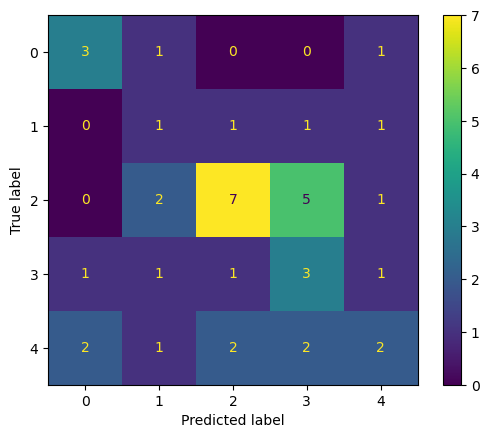

In [27]:
# Your code to display confusion matrix for logistic regression
cm = confusion_matrix(y_test, lgr_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=lgr.classes_)
disp.plot()
plt.show()

Next, compare the accuracy, precision, recall, and F-score for all the classifiers using plots. You need to have only one plot rather than 4 different plots for 4 different meteruces.

<BarContainer object of 3 artists>

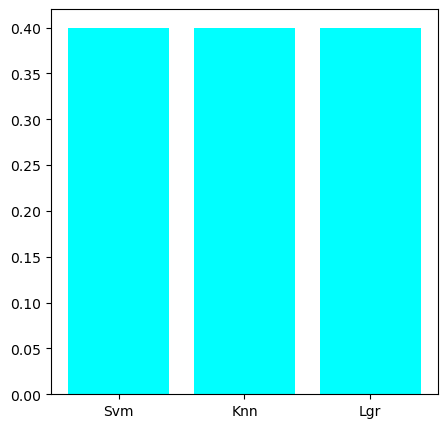

In [36]:
# Your code to plot and compare the performance of different algorithms
fig = plt.figure(figsize = (5, 5))
acc_classifier=[accuracy[2],accuracy_score(y_test, knn_pred),accuracy_score(y_test, lgr_pred)]
cls=['Svm','Knn','Lgr']
# creating the bar plot
plt.bar(cls,acc_classifier, color ='Cyan', 
        width = 0.8)
#


### **Important - Document in your Lab Logbook**

# 1.   Include a plot comparing the performance of various algorithms.
# 2.    Specify the best-performing algorithm and indicate which category exhibits the best and least performance based on the confusion metrics.

